# Metin Madenciliği ve Doğal Dil İşleme Giriş

*Metin Madenciliği*

metinsel verilerin incelenmesi, analiz edilmesi, yapılarının bulunması, pattern'lerinin bulunması, veri görselleştirme, kümeleme analizi gibi analizler kullanarak belgelerin kümelenmesi, modelleme çalışmaları yapılması (frekanslar oluşturup buradan modelleme işlemleri gerçekleştirmek)

*Doğal Dil İşleme*

bilgisayarların insanlar gibi metinleri anlayabilmesini sağlar. metinlerin içerisindeki zarf, sıfat, tamlama vb şeylerin tanımlanması, cümlelerin tanımlanması, örneğin bir yazının kategorisinin tanımlanması betimlenmesi 

bu ikisini analitik anlamda bir arada düşünüp text analitiği diyeceğiz

# Metin Ön İşleme

In [1]:
# Sherlock Holmes romanlarının isimleri
metin = """
A Scandal in Bohemia! 01
The Red-headed League,2
A Case, of Identity 33
The Boscombe Valley Mystery4
The Five Orange Pips1
The Man with? the Twisted Lip
The Adventure of the Blue Carbuncle
The Adventure of the Speckled Band
The Adventure of the Engineer's Thumb
The Adventure of the Noble Bachelor
The Adventure of the Beryl Coronet
The Adventure of the Copper Beeches"""

metin

"\nA Scandal in Bohemia! 01\nThe Red-headed League,2\nA Case, of Identity 33\nThe Boscombe Valley Mystery4\nThe Five Orange Pips1\nThe Man with? the Twisted Lip\nThe Adventure of the Blue Carbuncle\nThe Adventure of the Speckled Band\nThe Adventure of the Engineer's Thumb\nThe Adventure of the Noble Bachelor\nThe Adventure of the Beryl Coronet\nThe Adventure of the Copper Beeches"

## String'i array/seri/df'e çevirmek

In [2]:
# metni vektöre çevirelim
# bir bölme işlemi yapacağız: split
# buradaki ifadelerin her birisi ayrı bir roman

In [3]:
metin.split() # boşluklara göre bölmüş oldu

['A',
 'Scandal',
 'in',
 'Bohemia!',
 '01',
 'The',
 'Red-headed',
 'League,2',
 'A',
 'Case,',
 'of',
 'Identity',
 '33',
 'The',
 'Boscombe',
 'Valley',
 'Mystery4',
 'The',
 'Five',
 'Orange',
 'Pips1',
 'The',
 'Man',
 'with?',
 'the',
 'Twisted',
 'Lip',
 'The',
 'Adventure',
 'of',
 'the',
 'Blue',
 'Carbuncle',
 'The',
 'Adventure',
 'of',
 'the',
 'Speckled',
 'Band',
 'The',
 'Adventure',
 'of',
 'the',
 "Engineer's",
 'Thumb',
 'The',
 'Adventure',
 'of',
 'the',
 'Noble',
 'Bachelor',
 'The',
 'Adventure',
 'of',
 'the',
 'Beryl',
 'Coronet',
 'The',
 'Adventure',
 'of',
 'the',
 'Copper',
 'Beeches']

In [4]:
v_metin = metin.split("\n") # satır satır bölmüş oldum
v_metin

['',
 'A Scandal in Bohemia! 01',
 'The Red-headed League,2',
 'A Case, of Identity 33',
 'The Boscombe Valley Mystery4',
 'The Five Orange Pips1',
 'The Man with? the Twisted Lip',
 'The Adventure of the Blue Carbuncle',
 'The Adventure of the Speckled Band',
 "The Adventure of the Engineer's Thumb",
 'The Adventure of the Noble Bachelor',
 'The Adventure of the Beryl Coronet',
 'The Adventure of the Copper Beeches']

In [5]:
import pandas as pd

In [6]:
# bir seriye, vektöre çevirelim
v = pd.Series(v_metin)
v

0                                          
1                  A Scandal in Bohemia! 01
2                   The Red-headed League,2
3                    A Case, of Identity 33
4              The Boscombe Valley Mystery4
5                     The Five Orange Pips1
6             The Man with? the Twisted Lip
7       The Adventure of the Blue Carbuncle
8        The Adventure of the Speckled Band
9     The Adventure of the Engineer's Thumb
10      The Adventure of the Noble Bachelor
11       The Adventure of the Beryl Coronet
12      The Adventure of the Copper Beeches
dtype: object

In [7]:
# birinci elemandan kurtulalım
metin_vektoru = v[1:]
metin_vektoru

1                  A Scandal in Bohemia! 01
2                   The Red-headed League,2
3                    A Case, of Identity 33
4              The Boscombe Valley Mystery4
5                     The Five Orange Pips1
6             The Man with? the Twisted Lip
7       The Adventure of the Blue Carbuncle
8        The Adventure of the Speckled Band
9     The Adventure of the Engineer's Thumb
10      The Adventure of the Noble Bachelor
11       The Adventure of the Beryl Coronet
12      The Adventure of the Copper Beeches
dtype: object

In [8]:
# pandas DataFrame'e çevirelim
mdf = pd.DataFrame(metin_vektoru, columns = ["romanlar"])
mdf

,romanlar
1,A Scandal in Bohemia! 01
2,"The Red-headed League,2"
3,"A Case, of Identity 33"
4,The Boscombe Valley Mystery4
5,The Five Orange Pips1
6,The Man with? the Twisted Lip
7,The Adventure of the Blue Carbuncle
8,The Adventure of the Speckled Band
9,The Adventure of the Engineer's Thumb
10,The Adventure of the Noble Bachelor


## Büyük - Küçük Harf Dönüşümü

In [9]:
d_mdf = mdf.copy()
d_mdf

,romanlar
1,A Scandal in Bohemia! 01
2,"The Red-headed League,2"
3,"A Case, of Identity 33"
4,The Boscombe Valley Mystery4
5,The Five Orange Pips1
6,The Man with? the Twisted Lip
7,The Adventure of the Blue Carbuncle
8,The Adventure of the Speckled Band
9,The Adventure of the Engineer's Thumb
10,The Adventure of the Noble Bachelor


In [10]:
list1 = [1,2,3]

In [11]:
str1 = " ".join(str(i) for i in list1)
str1

'1 2 3'

In [12]:
# x satırdır, e ise satırın içerisindeki sözcüklerdir
# romanlar değişkeninin her bir satırına aynı işlemi uygular
d_mdf = d_mdf["romanlar"].apply(lambda x: " ".join(e.lower() for e in x.split()))
d_mdf

1                  a scandal in bohemia! 01
2                   the red-headed league,2
3                    a case, of identity 33
4              the boscombe valley mystery4
5                     the five orange pips1
6             the man with? the twisted lip
7       the adventure of the blue carbuncle
8        the adventure of the speckled band
9     the adventure of the engineer's thumb
10      the adventure of the noble bachelor
11       the adventure of the beryl coronet
12      the adventure of the copper beeches
Name: romanlar, dtype: object

## Noktalama İşaretlerinin Silinmesi

In [13]:
d_mdf

1                  a scandal in bohemia! 01
2                   the red-headed league,2
3                    a case, of identity 33
4              the boscombe valley mystery4
5                     the five orange pips1
6             the man with? the twisted lip
7       the adventure of the blue carbuncle
8        the adventure of the speckled band
9     the adventure of the engineer's thumb
10      the adventure of the noble bachelor
11       the adventure of the beryl coronet
12      the adventure of the copper beeches
Name: romanlar, dtype: object

In [14]:
# noktalama işaretlerini sildim
d_mdf = d_mdf.str.replace("[^\w\s]","")
d_mdf

/var/folders/x8/nnk_zbps5d547d0lzb19x0s80000gn/T/ipykernel_1015/878877686.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  d_mdf = d_mdf.str.replace("[^\w\s]","")


1                  a scandal in bohemia 01
2                    the redheaded league2
3                    a case of identity 33
4             the boscombe valley mystery4
5                    the five orange pips1
6             the man with the twisted lip
7      the adventure of the blue carbuncle
8       the adventure of the speckled band
9     the adventure of the engineers thumb
10     the adventure of the noble bachelor
11      the adventure of the beryl coronet
12     the adventure of the copper beeches
Name: romanlar, dtype: object

## Sayıların Silinmesi

In [15]:
d_mdf = d_mdf.str.replace("\d","")
d_mdf

/var/folders/x8/nnk_zbps5d547d0lzb19x0s80000gn/T/ipykernel_1015/3120017985.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  d_mdf = d_mdf.str.replace("\d","")


1                    a scandal in bohemia 
2                     the redheaded league
3                      a case of identity 
4              the boscombe valley mystery
5                     the five orange pips
6             the man with the twisted lip
7      the adventure of the blue carbuncle
8       the adventure of the speckled band
9     the adventure of the engineers thumb
10     the adventure of the noble bachelor
11      the adventure of the beryl coronet
12     the adventure of the copper beeches
Name: romanlar, dtype: object

## Stopwords

stopwords, durma kelimeleri veya sık kullanılan kelimeler: the, of, with...

In [16]:
!pip install nltk

In [17]:
import nltk

In [18]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rumeysaay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords

In [20]:
# bu stopwords'lerin içerisinden ingiliz diline ait stopwords'leri alacağım
sw = stopwords.words("english")
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
type(d_mdf) 

pandas.core.series.Series

In [22]:
# DataFrame temelli bir lambda çalıştıracağımızdan DataFrame'e dönüştürdüm
d_mdf = pd.DataFrame(d_mdf, columns=["romanlar"])
d_mdf

,romanlar
1,a scandal in bohemia
2,the redheaded league
3,a case of identity
4,the boscombe valley mystery
5,the five orange pips
6,the man with the twisted lip
7,the adventure of the blue carbuncle
8,the adventure of the speckled band
9,the adventure of the engineers thumb
10,the adventure of the noble bachelor


In [23]:
# stopwords'leri silelim
# x, romanlar değişkeninin her bir değerini ifade eder
# e, bu değerin her bir sözcüğüdür
# e eğer sw'nin içerisinde yoksa birleştir
d_mdf = d_mdf["romanlar"].apply(lambda x: " ".join(e for e in x.split() if e not in sw ))
d_mdf

1               scandal bohemia
2              redheaded league
3                 case identity
4       boscombe valley mystery
5              five orange pips
6               man twisted lip
7      adventure blue carbuncle
8       adventure speckled band
9     adventure engineers thumb
10     adventure noble bachelor
11      adventure beryl coronet
12     adventure copper beeches
Name: romanlar, dtype: object

## Az Geçen Kelimelerin Silinmesi

In [24]:
type(d_mdf)

pandas.core.series.Series

In [25]:
d_mdf = pd.DataFrame(d_mdf, columns=["romanlar"])

In [26]:
" ".join(d_mdf["romanlar"])

'scandal bohemia redheaded league case identity boscombe valley mystery five orange pips man twisted lip adventure blue carbuncle adventure speckled band adventure engineers thumb adventure noble bachelor adventure beryl coronet adventure copper beeches'

In [27]:
" ".join(d_mdf["romanlar"]).split()

['scandal',
 'bohemia',
 'redheaded',
 'league',
 'case',
 'identity',
 'boscombe',
 'valley',
 'mystery',
 'five',
 'orange',
 'pips',
 'man',
 'twisted',
 'lip',
 'adventure',
 'blue',
 'carbuncle',
 'adventure',
 'speckled',
 'band',
 'adventure',
 'engineers',
 'thumb',
 'adventure',
 'noble',
 'bachelor',
 'adventure',
 'beryl',
 'coronet',
 'adventure',
 'copper',
 'beeches']

In [28]:
pd.Series(" ".join(d_mdf["romanlar"]).split())

0       scandal
1       bohemia
2     redheaded
3        league
4          case
5      identity
6      boscombe
7        valley
8       mystery
9          five
10       orange
11         pips
12          man
13      twisted
14          lip
15    adventure
16         blue
17    carbuncle
18    adventure
19     speckled
20         band
21    adventure
22    engineers
23        thumb
24    adventure
25        noble
26     bachelor
27    adventure
28        beryl
29      coronet
30    adventure
31       copper
32      beeches
dtype: object

In [29]:
pd.Series(" ".join(d_mdf["romanlar"]).split()).value_counts()

adventure    6
scandal      1
bohemia      1
copper       1
coronet      1
beryl        1
bachelor     1
noble        1
thumb        1
engineers    1
band         1
speckled     1
carbuncle    1
blue         1
lip          1
twisted      1
man          1
pips         1
orange       1
five         1
mystery      1
valley       1
boscombe     1
identity     1
case         1
league       1
redheaded    1
beeches      1
dtype: int64

In [30]:
# ihtiyaç olduğunda en az kullanılan değerler silinir
# örneğin son 3 değeri silelim (en az frekansa sahip gözlemler olduğunu varsayalım)
sil = pd.Series(" ".join(d_mdf["romanlar"]).split()).value_counts()[-3:]
sil

league       1
redheaded    1
beeches      1
dtype: int64

In [31]:
d_mdf

,romanlar
1,scandal bohemia
2,redheaded league
3,case identity
4,boscombe valley mystery
5,five orange pips
6,man twisted lip
7,adventure blue carbuncle
8,adventure speckled band
9,adventure engineers thumb
10,adventure noble bachelor


In [32]:
d_mdf["romanlar"].apply(lambda x: " ".join(e for e in x.split() if e not in sil))

1               scandal bohemia
2                              
3                 case identity
4       boscombe valley mystery
5              five orange pips
6               man twisted lip
7      adventure blue carbuncle
8       adventure speckled band
9     adventure engineers thumb
10     adventure noble bachelor
11      adventure beryl coronet
12             adventure copper
Name: romanlar, dtype: object

## Tokenization

cümleyi kelimelere ayırmaktır. yeni bir vektör oluşturmak, yeni bir liste oluşturmak işlemleri olarak düşünebiliriz. bir gözleminin içerisine gidip bir döngü ile split yapmıştık.

In [33]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/rumeysaay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
!pip install textblob

In [35]:
import textblob
from textblob import TextBlob

In [37]:
d_mdf["romanlar"]

1               scandal bohemia
2              redheaded league
3                 case identity
4       boscombe valley mystery
5              five orange pips
6               man twisted lip
7      adventure blue carbuncle
8       adventure speckled band
9     adventure engineers thumb
10     adventure noble bachelor
11      adventure beryl coronet
12     adventure copper beeches
Name: romanlar, dtype: object

In [38]:
d_mdf["romanlar"][1]

'scandal bohemia'

In [39]:
TextBlob(d_mdf["romanlar"][1])

TextBlob("scandal bohemia")

In [40]:
TextBlob(d_mdf["romanlar"][1]).words

WordList(['scandal', 'bohemia'])

In [41]:
# yukarıdaki işlemi bütün elemanlara uygulayalım
# romanların her bir satırı x'dir.
d_mdf["romanlar"].apply(lambda x: TextBlob(x).words)

1                [scandal, bohemia]
2               [redheaded, league]
3                  [case, identity]
4       [boscombe, valley, mystery]
5              [five, orange, pips]
6               [man, twisted, lip]
7      [adventure, blue, carbuncle]
8       [adventure, speckled, band]
9     [adventure, engineers, thumb]
10     [adventure, noble, bachelor]
11      [adventure, beryl, coronet]
12     [adventure, copper, beeches]
Name: romanlar, dtype: object

## Stemming

bir kelimeyi köküne indirger.

In [42]:
# ingilizce kelimelere bakacağız. kelimelerin sonundaki takıları yok edeceğim.
from nltk.stem import PorterStemmer

In [43]:
st = PorterStemmer()

In [44]:
# x, romanlar değişkeninin her bir değerini ifade eder
# e, bu değerin her bir sözcüğüdür
d_mdf["romanlar"].apply(lambda x: " ".join(st.stem(e) for e in x.split()))
# kelimeler köklerine indirgenmiş oldu
# hatalı bir şekilde indirgendiğini görüyoruz: adventur

1            scandal bohemia
2              redhead leagu
3                 case ident
4     boscomb valley mysteri
5             five orang pip
6              man twist lip
7     adventur blue carbuncl
8       adventur speckl band
9       adventur engin thumb
10    adventur nobl bachelor
11    adventur beryl coronet
12     adventur copper beech
Name: romanlar, dtype: object

## Lemmatization

bir kelimeyi köküne indirger. Stemming'den daha başarılıdır.

In [46]:
from textblob import Word

In [47]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rumeysaay/nltk_data...


True

In [48]:
# x, romanlar değişkeninin her bir değerini ifade eder
# e, bu değerin her bir sözcüğüdür
d_mdf["romanlar"].apply(lambda x: " ".join(Word(e).lemmatize() for e in x.split()))

1              scandal bohemia
2             redheaded league
3                case identity
4      boscombe valley mystery
5              five orange pip
6              man twisted lip
7     adventure blue carbuncle
8      adventure speckled band
9     adventure engineer thumb
10    adventure noble bachelor
11     adventure beryl coronet
12      adventure copper beech
Name: romanlar, dtype: object

# NLP Uygulamaları

## N-Gram

N-gram'lar birlikte kullanılan kelimelerin kombinasyolarını gösterir.

In [49]:
a = """Bu örneği anlaşılabilmesi için daha uzun bir metin üzerinden göstereceğim.
N-gram'lar birlikte kullanılan kelimelerin kombinasyolarını gösterir"""

In [50]:
import textblob
from textblob import TextBlob

In [51]:
TextBlob(a).ngrams(1)

[WordList(['Bu']),
 WordList(['örneği']),
 WordList(['anlaşılabilmesi']),
 WordList(['için']),
 WordList(['daha']),
 WordList(['uzun']),
 WordList(['bir']),
 WordList(['metin']),
 WordList(['üzerinden']),
 WordList(['göstereceğim']),
 WordList(["N-gram'lar"]),
 WordList(['birlikte']),
 WordList(['kullanılan']),
 WordList(['kelimelerin']),
 WordList(['kombinasyolarını']),
 WordList(['gösterir'])]

In [52]:
TextBlob(a).ngrams(2)

[WordList(['Bu', 'örneği']),
 WordList(['örneği', 'anlaşılabilmesi']),
 WordList(['anlaşılabilmesi', 'için']),
 WordList(['için', 'daha']),
 WordList(['daha', 'uzun']),
 WordList(['uzun', 'bir']),
 WordList(['bir', 'metin']),
 WordList(['metin', 'üzerinden']),
 WordList(['üzerinden', 'göstereceğim']),
 WordList(['göstereceğim', "N-gram'lar"]),
 WordList(["N-gram'lar", 'birlikte']),
 WordList(['birlikte', 'kullanılan']),
 WordList(['kullanılan', 'kelimelerin']),
 WordList(['kelimelerin', 'kombinasyolarını']),
 WordList(['kombinasyolarını', 'gösterir'])]

In [53]:
TextBlob(a).ngrams(3)

[WordList(['Bu', 'örneği', 'anlaşılabilmesi']),
 WordList(['örneği', 'anlaşılabilmesi', 'için']),
 WordList(['anlaşılabilmesi', 'için', 'daha']),
 WordList(['için', 'daha', 'uzun']),
 WordList(['daha', 'uzun', 'bir']),
 WordList(['uzun', 'bir', 'metin']),
 WordList(['bir', 'metin', 'üzerinden']),
 WordList(['metin', 'üzerinden', 'göstereceğim']),
 WordList(['üzerinden', 'göstereceğim', "N-gram'lar"]),
 WordList(['göstereceğim', "N-gram'lar", 'birlikte']),
 WordList(["N-gram'lar", 'birlikte', 'kullanılan']),
 WordList(['birlikte', 'kullanılan', 'kelimelerin']),
 WordList(['kullanılan', 'kelimelerin', 'kombinasyolarını']),
 WordList(['kelimelerin', 'kombinasyolarını', 'gösterir'])]

## Part of Speech Tagging (POS)

Metinde bulunan kelimelerin sıfat, zarf, isim olma durumlarını tespit eder.

In [54]:
import nltk

In [55]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rumeysaay/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [57]:
d_mdf["romanlar"][2]

'redheaded league'

In [59]:
# zarf, sıfat, isim olarak gösterdi.
TextBlob(d_mdf["romanlar"][2]).tags

[('redheaded', 'VBN'), ('league', 'NN')]

In [60]:
# bütün satır ve kelimelere uygulayalım
d_mdf["romanlar"].apply(lambda x: TextBlob(x).tags)

1                        [(scandal, NN), (bohemia, NN)]
2                      [(redheaded, VBN), (league, NN)]
3                          [(case, NN), (identity, NN)]
4         [(boscombe, NN), (valley, NN), (mystery, NN)]
5               [(five, CD), (orange, NN), (pips, NNS)]
6                [(man, NN), (twisted, VBD), (lip, NN)]
7        [(adventure, NN), (blue, JJ), (carbuncle, NN)]
8        [(adventure, NN), (speckled, VBD), (band, NN)]
9     [(adventure, NN), (engineers, NNS), (thumb, VBP)]
10       [(adventure, NN), (noble, JJ), (bachelor, NN)]
11        [(adventure, NN), (beryl, NN), (coronet, NN)]
12      [(adventure, NN), (copper, NN), (beeches, NNS)]
Name: romanlar, dtype: object

## Chunking (Shallow Parsing)

Sıfat, zarf durumlarını bir diyagram ile gösterebiliriz.

In [64]:
cumle = """R and Python are useful data science tools for 
the new or old data scientists who eager to do efficent data science task"""

In [65]:
pos = TextBlob(cumle).tags
pos

[('R', 'NNP'),
 ('and', 'CC'),
 ('Python', 'NNP'),
 ('are', 'VBP'),
 ('useful', 'JJ'),
 ('data', 'NNS'),
 ('science', 'NN'),
 ('tools', 'NNS'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('new', 'JJ'),
 ('or', 'CC'),
 ('old', 'JJ'),
 ('data', 'NNS'),
 ('scientists', 'NNS'),
 ('who', 'WP'),
 ('eager', 'VBP'),
 ('to', 'TO'),
 ('do', 'VB'),
 ('efficent', 'JJ'),
 ('data', 'NNS'),
 ('science', 'NN'),
 ('task', 'NN')]

In [66]:
reg_exp = "NP: {<DT>?<JJ>*<NN>}"

In [67]:
rp=nltk.RegexpParser(reg_exp)

In [74]:
sonuclar = rp.parse(pos)
print(sonuclar)

(S
  R/NNP
  and/CC
  Python/NNP
  are/VBP
  useful/JJ
  data/NNS
  (NP science/NN)
  tools/NNS
  for/IN
  the/DT
  new/JJ
  or/CC
  old/JJ
  data/NNS
  scientists/NNS
  who/WP
  eager/VBP
  to/TO
  do/VB
  efficent/JJ
  data/NNS
  (NP science/NN)
  (NP task/NN))


In [71]:
sonuclar.draw()

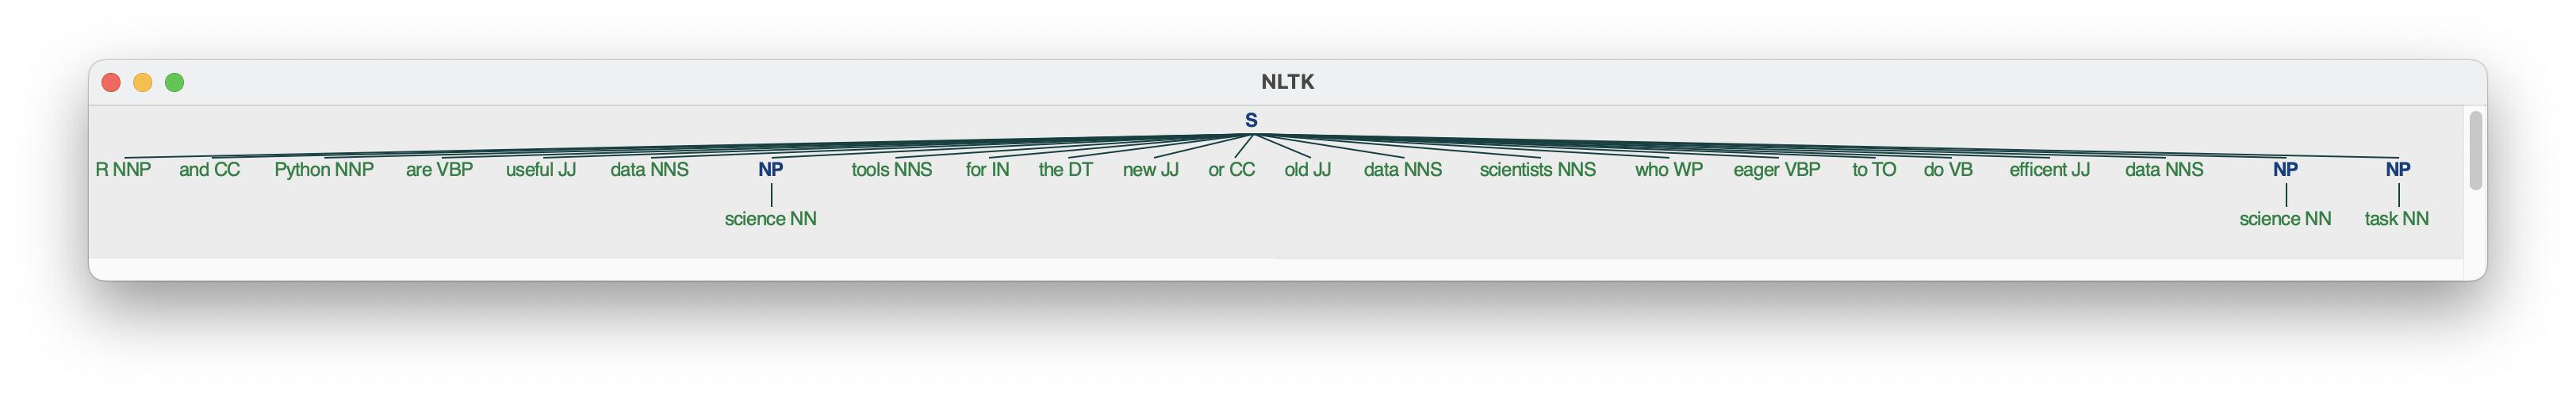

## Named Entity Recognition

verilen metinlerin içerisindeki öncekine benzer şekilde tanımlama işlemlerini gerçekleştirir. öncekinden farkı ise öncekinde kelimeleri sıfat, zarf... şeklinde ayırmıştı. burada ise örneğin bulanan nesne öğesi nedir bunu söyler apartman mı? kişi ismi mi?

In [72]:
from nltk import word_tokenize, pos_tag, ne_chunk

In [73]:
nltk.download("maxent_ne_chunker")
nltk.download("words")

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/rumeysaay/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /Users/rumeysaay/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [83]:
cumle = "Hadley is creative people who work for R Studio AND he attented conference at Newyork last year"

In [84]:
# örneğin Newyork'un şehir olduğunu söylemeli

In [85]:
print(ne_chunk(pos_tag(word_tokenize(cumle))))

(S
  (GPE Hadley/NNP)
  is/VBZ
  creative/JJ
  people/NNS
  who/WP
  work/VBP
  for/IN
  (ORGANIZATION R/NNP Studio/NNP)
  AND/CC
  he/PRP
  attented/VBD
  conference/NN
  at/IN
  (ORGANIZATION Newyork/NNP)
  last/JJ
  year/NN)


# Matematiksel İşlemler ve Basit Özellik Çıkarımı

Ham verileri ön işleme işlemlerinden geçirip bu metinleri temsil edebilecek nümerik frekanslara erişmeliyiz. bu nümerik frekanslara eriştiğimizde aslında ortaya bir _**özellik**_ çıkarmış oluyoruz.

## Harf/Karakter Sayısı

In [90]:
o_df = d_mdf.copy()

In [91]:
o_df["romanlar"]

1               scandal bohemia
2              redheaded league
3                 case identity
4       boscombe valley mystery
5              five orange pips
6               man twisted lip
7      adventure blue carbuncle
8       adventure speckled band
9     adventure engineers thumb
10     adventure noble bachelor
11      adventure beryl coronet
12     adventure copper beeches
Name: romanlar, dtype: object

In [92]:
# her satır için harf sayma
o_df["romanlar"].str.len()

1     15
2     16
3     13
4     23
5     16
6     15
7     24
8     23
9     25
10    24
11    23
12    24
Name: romanlar, dtype: int64

In [93]:
# o_df'e harf_sayisi değişkenini ekliyorum
o_df["harf_sayisi"] = o_df["romanlar"].str.len()

In [94]:
o_df

,romanlar,harf_sayisi
1,scandal bohemia,15
2,redheaded league,16
3,case identity,13
4,boscombe valley mystery,23
5,five orange pips,16
6,man twisted lip,15
7,adventure blue carbuncle,24
8,adventure speckled band,23
9,adventure engineers thumb,25
10,adventure noble bachelor,24


Amacımız buradaki her bir hikayeyi temsil edecek nümerik bir değer. her satırı temsil eden bir harf sayısı var. özellik çıkarımı temsil edecek nümerik bir değer çıkarımıdır.

## Kelime Sayısı

In [95]:
a = "scandal in a bohemia"

In [96]:
# kelimelerine bölündü
a.split()

['scandal', 'in', 'a', 'bohemia']

In [97]:
len(a.split())

4

In [ ]:
# DataFrame'e uygulayalım

In [98]:
o_df[0:1]

,romanlar,harf_sayisi
1,scandal bohemia,15


In [105]:
o_df.iloc[0,0]

'scandal bohemia'

In [106]:
o_df.iloc[0,0].split()

['scandal', 'bohemia']

In [110]:
o_df.iloc[1,0].split()

['redheaded', 'league']

In [111]:
# apply, her bir satıra uygular her bir satır x ile temsil edilir
o_df["romanlar"].apply(lambda x:len(x.split()))

1     2
2     2
3     2
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
Name: romanlar, dtype: int64

In [112]:
# o_df'e değişken ekleyelim
o_df["kelime_sayisi"] = o_df["romanlar"].apply(lambda x:len(x.split()))

In [113]:
o_df

,romanlar,harf_sayisi,kelime_sayisi
1,scandal bohemia,15,2
2,redheaded league,16,2
3,case identity,13,2
4,boscombe valley mystery,23,3
5,five orange pips,16,3
6,man twisted lip,15,3
7,adventure blue carbuncle,24,3
8,adventure speckled band,23,3
9,adventure engineers thumb,25,3
10,adventure noble bachelor,24,3


## Özel Karakterleri Yakalamak & Saydırmak

In [120]:
# adventure kelimesini bulalım
# her bir satır yani roman, x'dir
o_df["romanlar"].apply(lambda x: len([adv for adv in x.split() if adv.startswith("adventure")]))

1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     1
10    1
11    1
12    1
Name: romanlar, dtype: int64

In [121]:
o_df["ozel_karakter_sayisi"] = o_df["romanlar"].apply(lambda x: len([adv for adv in x.split() if adv.startswith("adventure")]))

In [122]:
o_df

,romanlar,harf_sayisi,kelime_sayisi,ozel_karakter_sayisi
1,scandal bohemia,15,2,0
2,redheaded league,16,2,0
3,case identity,13,2,0
4,boscombe valley mystery,23,3,0
5,five orange pips,16,3,0
6,man twisted lip,15,3,0
7,adventure blue carbuncle,24,3,1
8,adventure speckled band,23,3,1
9,adventure engineers thumb,25,3,1
10,adventure noble bachelor,24,3,1


## Sayıları Yakalamak & Saydırmak

isdigit, isnumeric

In [123]:
mdf

,romanlar
1,A Scandal in Bohemia! 01
2,"The Red-headed League,2"
3,"A Case, of Identity 33"
4,The Boscombe Valley Mystery4
5,The Five Orange Pips1
6,The Man with? the Twisted Lip
7,The Adventure of the Blue Carbuncle
8,The Adventure of the Speckled Band
9,The Adventure of the Engineer's Thumb
10,The Adventure of the Noble Bachelor


In [129]:
mdf["romanlar"].apply(lambda x: len([sayi for sayi in x.split() if sayi.isdigit()]))

1     1
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
Name: romanlar, dtype: int64

In [130]:
o_df["sayi_sayisi"] = mdf["romanlar"].apply(lambda x: len([sayi for sayi in x.split() if sayi.isdigit()]))

In [131]:
o_df

,romanlar,harf_sayisi,kelime_sayisi,ozel_karakter_sayisi,sayi_sayisi
1,scandal bohemia,15,2,0,1
2,redheaded league,16,2,0,0
3,case identity,13,2,0,1
4,boscombe valley mystery,23,3,0,0
5,five orange pips,16,3,0,0
6,man twisted lip,15,3,0,0
7,adventure blue carbuncle,24,3,1,0
8,adventure speckled band,23,3,1,0
9,adventure engineers thumb,25,3,1,0
10,adventure noble bachelor,24,3,1,0
